# CSE/STAT 416 Section 3 (7/9/2020)
We will discuss sigmoid function, logistic regression and evaluation metrics for classification problems. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Sigmoid function 
The definition of sigmoid/logistic function is as following:
$$
S(x) = \frac{1}{1 + \exp(-x)}
$$


In [ ]:
def sigmoid_function(x):
  return 1. / (1. + np.exp(-x))

Text(0, 0.5, 'S(x)')

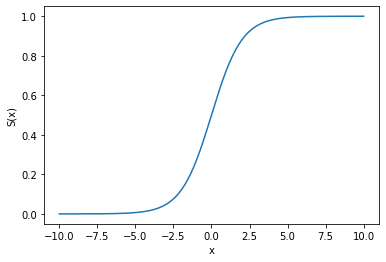

In [ ]:
x = np.linspace(-10, 10, 200)
plt.plot(x, sigmoid_function(x))
plt.xlabel('x')
plt.ylabel('S(x)')

# Some nice properties of sigmoid function


1.   It is monotone increasing in $x$.
2.   The function value is always between [0,1], thus perfect for modeling probabilities.


# Logistic Regression
Data: $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$ where $x_i \in \mathbb{R}^k$ and $y_i \in \{0, +1\}$. 

Logistic regression uses sigmoid function to estimate the probability of $y_i$ being +1. 
$$
P(y_i = +1 | x_i, \beta) = \frac{1}{1 + \exp(-x_i^T \beta)} = S(x_i^T \beta)
$$

what about the probability of $y_i$ being 0?
$$
P(y_i = 0 | x_i, \beta) = \frac{1}{1 + \exp(x_i^T \beta)}
$$
Check it yourself that above expression is correct. **Notice here we code the baseline class as 0 instead of -1.**

The likelihood is:
$$
L_n(\beta) = \prod_{i=1}^n P(y_i | x_i, \beta)
$$
And the log-likelihood looks like following:
$$
l_n(\beta) = \sum_{i=1: y_i = +1}^n \ln\left(\frac{1}{1 + \exp(-x_i^T\beta)}\right) + \sum_{i=1:y_i = 0}^n \ln \left(\frac{1}{1 + \exp(x_i^T \beta)} \right)
$$

# Logistic Regrssion used as a classifier

1. Use data to "get" an estimate of parameter $\hat{\beta}$,  we will talk about how to estimate the parameter later 
2. Given an new input $x$, estimate the probability of $y$ being +1:
$$
P(y = 1 |x, \hat{\beta}) = 1 / (1 + \exp(-x^T \hat{\beta})
$$
3. Pick a threshold, say $0.5$,
$$
\hat{y} = \begin{cases} 
+1 & P(y = 1 | x, \hat{\beta}) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

**Note that the threshold does not need to be fixed as 0.5**. The choice really depend on the specific problem and what you care about. In the example with medical diagnostics for cancer, a lower threshold is usually preferred so a patient with cancer would be more likely discovered. For the example with spam email detection, a higher threshold is probably better so an important email would be less likely to be classified as spam.

# Logistic Regression:  Maximum likelihood estimation of $\beta$

## Motivation for using likelihood:
In linear regression, we minimized the RSS, through the same way we can minimize the classification error:
$$
\hat{\beta} = \arg\min_w \frac{1}{n} \sum_{i=1}^n I(y_i \neq \hat{y}_i)
$$
This loss function is inituitive, but very hard to solve.


Instead, with logistic regression, a probabilistic model, we could use maximum likelihood estimation to estimate the parameter $\beta$.

## Likelihood:
For logistic regression, given a data point $(x_i, y_i)$, assuming that $y_i = 1$, then likelihood for this single data point would be 
$$
l(\beta) = P(y = 1 | x; \beta) = \frac{1}{1 + \exp(-x^T \beta)}
$$
notice that we usually view the above probility as a function of features/input $x$, but we could also view it as a function of the parameter $\beta$. The idea for maximum likelihood estimation is that we would like our parameter $\beta$ to maximize the above probability. A larger probability indicates a better fit of our model.  

With multiple data points, the joint likelihood is simply defined as the product of the likelihood for each individual data point. We usually maximize the log of the likelihood for computational reasons. The maximizer would be the same since log is a monotone function.

# How `sklearn` works in the background
For linear regression, we were able to find the parameters of the model in a closed form by using the sufficient statistics or by minimizing the RSS objective with gradient descent. **For logistic regression, there is no closed form solution**, so we must resort to gradient-based methods like gradient ascent (ascent because we're trying to maximize the log likelihood instead of minimize) to solve the problem. You could implement logistic regression yourself by calculating the gradient of the log likelihood $\nabla l(\beta)$ and applying our update rule $\beta\leftarrow \beta + \eta \nabla l(\beta)$ (we would use + instead of - because we're trying to maximize) until convergence. The log likelihood function is *concave* with respect to $\beta$, so with the appropriate learning rate and enough iterations, we will converge to the right answer.

`sklearn.linear_model.LogisticRegression` takes in a `solver` parameter which determines how it will find $\beta$. Though the different solvers have advantages and disadvantages based on the problem, they all use local information (like the gradient) to try and find the optimum.


## Example:
Suppose now we have four data points:
1. $(x_1, y_1) = (1, 1)$
2. $(x_2, y_2) = (-1, 0)$
3. $(x_3, y_3) = (-0.2, 1)$
4. $(x_4, y_4) = (0.2, 0)$.

The logistic regression model would then just be 
$$
P(y = 1|x; \beta) = \frac{1}{1 + \exp(-\beta_0 - \beta_1 * x)}
$$

In [ ]:
# data
x_1, y_1 = (1, 1)
x_2, y_2 = (-1, 0)
x_3, y_3 = (-0.2, 1)
x_4, y_4 = (0.2, 0)

X_small = np.array([x_1, x_2, x_3, x_4]).reshape((4, 1))
X_small = np.append(np.ones((4, 1)), X_small, 1)
Y_small = np.array([y_1, y_2, y_3, y_4])

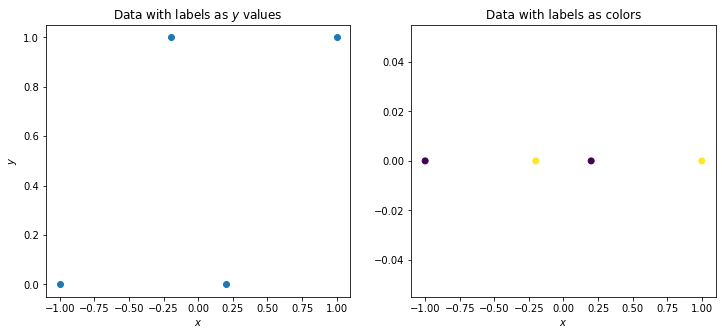

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))
axes[0].scatter([x_1, x_2, x_3, x_4], Y_small)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('Data with labels as $y$ values')

axes[1].scatter([x_1, x_2, x_3, x_4], [0] * 4, c=Y_small)
axes[1].set_xlabel('$x$')
axes[1].set_title('Data with labels as colors')

plt.show()


In [ ]:
# Compute the log likelihood for logistic regression
def logistic_log_likelihood(beta_0, beta_1):
  l_1 = sigmoid_function(beta_0 + beta_1 * x_1)
  l_2 = 1 - sigmoid_function(beta_0 + beta_1 * x_2)
  l_3 = sigmoid_function(beta_0 + beta_1 * x_3)
  l_4 = 1 - sigmoid_function(beta_0 + beta_1 * x_4)
  return np.log(l_1) + np.log(l_2) + np.log(l_3) + np.log(l_4)

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression model
model_2 = LogisticRegression(penalty = 'none') 
model_2.fit(X_small, Y_small)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
mle_estimate = model_2.coef_[0]
print('Maximum likelihood estimate would be : (%.3f, %.3f)' % (mle_estimate[0], mle_estimate[1]))

Maximum likelihood estimate would be : (0.000, 1.995)


Estimate of the parameter would be:

$\hat{\beta}_0 = 0$, $\hat{\beta}_1 = 1.995$

decision_xs:  [0.0, 0.0]
decision_ys:  [-1, 1]


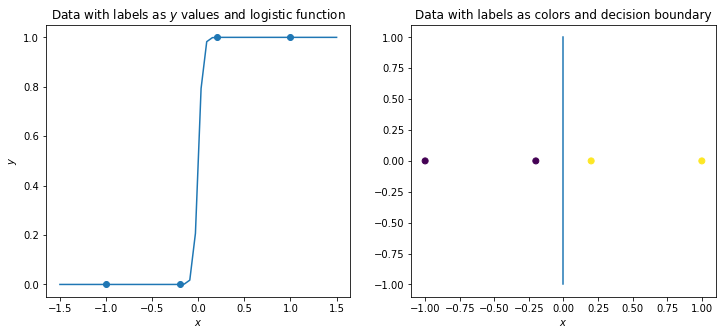

In [ ]:
# plot of the decision boundary
# everything on the left of the boundary the model will guess 0, on the right +1

xs = np.linspace(-1.5, 1.5)
ys = sigmoid_function(mle_estimate[0] + xs * mle_estimate[1])

fig, axes = plt.subplots(1,2, figsize=(12, 5))
axes[0].scatter([x_1, x_2, x_3, x_4], Y_small)
axes[0].plot(xs, ys)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('Data with labels as $y$ values and logistic function')


decision_xs = [mle_estimate[0], mle_estimate[0]]
decision_ys = [-1, 1]
print("decision_xs: ", decision_xs)
print("decision_ys: ", decision_ys)

axes[1].scatter([x_1, x_2, x_3, x_4], [0] * 4, c=Y_small)
axes[1].plot(decision_xs, decision_ys)
axes[1].set_xlabel('$x$')
axes[1].set_title('Data with labels as colors and decision boundary')

plt.show()


Text(0.5, 0, 'log-likelihood')

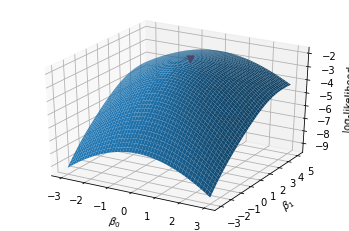

In [ ]:
# plot the loglikelihood over different parameter value and 
# also plot the maximizer as a red dot.
beta_0 = np.linspace(-3, 3, 200)
beta_1 = np.linspace(-3, 5, 300)
beta_0, beta_1 = np.meshgrid(beta_0, beta_1)
loglik = logistic_log_likelihood(beta_0, beta_1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(beta_0, beta_1, loglik)
ax.scatter(mle_estimate[0], mle_estimate[1], 
           logistic_log_likelihood(mle_estimate[0], mle_estimate[1]), c='red',
           s= 50, marker='v', alpha=1)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_zlabel('log-likelihood')


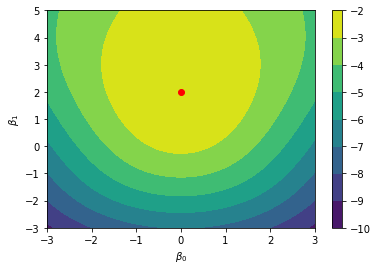

In [ ]:
fig1, ax2 = plt.subplots()
cs = ax2.contourf(beta_0, beta_1, loglik)
cbar = fig1.colorbar(cs)
ax2.scatter(mle_estimate[0], mle_estimate[1], color='red')
ax2.set_xlabel(r'$\beta_0$')
ax2.set_ylabel(r'$\beta_1$')
plt.show()

# Linear Regression vs Logistic Regression
It is totally possible to use linear regression for classification. We could just minimize the RSS objective and restrict our $y$'s to be 0 or 1 (or -1 and 1), then use a threshold to determine if we think it is a positive or not.

Let's see what that would look like with our data.

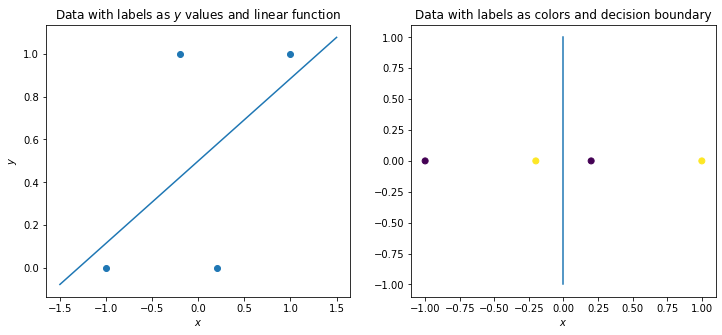

In [ ]:
from sklearn.linear_model import LinearRegression # import linear regression model
model_2 = LinearRegression(fit_intercept=False) # doing the bias manually
model_2.fit(X_small, Y_small)

xs = np.linspace(-1.5, 1.5).reshape(-1, 1)
xs = np.append(np.ones((xs.shape[0], 1)), xs, 1)
ys = model_2.predict(xs)

fig, axes = plt.subplots(1,2, figsize=(12, 5))
axes[0].scatter([x_1, x_2, x_3, x_4], Y_small)
axes[0].plot(xs[:, 1], ys)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('Data with labels as $y$ values and linear function')

thresh = 0.5
thresh_cross = (thresh - model_2.coef_[0]) / model_2.coef_[1] # thresh = m*x + b, solve for x

decision_xs = [thresh_cross, thresh_cross]
decision_ys = [-1, 1]

axes[1].scatter([x_1, x_2, x_3, x_4], [0] * 4, c=Y_small)
axes[1].plot(decision_xs, decision_ys)
axes[1].set_xlabel('$x$')
axes[1].set_title('Data with labels as colors and decision boundary')

plt.show()


Although in this example we have the same decision boundary, this is not the case in general. Moreover, we are unable to interpret the score as a probability.

# Real Data Example:  [Breast Cancer Wisconsin (Diagnostic) Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

Goal:  Use features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass to predict type of breast cancer.



In [ ]:
from sklearn.datasets import load_breast_cancer # load dataset 
from sklearn.model_selection import train_test_split # split the dataset 
from sklearn.preprocessing import StandardScaler # scale the features
from sklearn.linear_model import LogisticRegression # import logistic regression model

In [ ]:
dataset = load_breast_cancer() # returns a dictionary

In [ ]:
list(dataset.target_names)

['malignant', 'benign']

In [ ]:
y = dataset.target
X = dataset.data

In [ ]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# Split dataset into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [ ]:
# Next standardize the dataset
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Create and train logistic regression model
model = LogisticRegression(penalty = 'none') 
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Let's see the estimated coefficient
def print_coefficients(coef, features):
    """
    This function takes in a model column and a features column. 
    And prints the coefficient along with its feature name.
    """
    feats = list(zip(features, coef))
    print(*feats, sep = "\n")
    
print_coefficients(model.coef_[0], dataset.feature_names)

('mean radius', 11.586773784280616)
('mean texture', 39.849182759345474)
('mean perimeter', 11.998228602537782)
('mean area', -0.14805398607673614)
('mean smoothness', 22.814448527264332)
('mean compactness', 93.8645695173821)
('mean concavity', -126.46125095529176)
('mean concave points', -110.8289836578708)
('mean symmetry', 16.824294639349723)
('mean fractal dimension', -41.878126210225574)
('radius error', -123.90151203976164)
('texture error', 97.06697583825192)
('perimeter error', -38.30669707672605)
('area error', -85.15907030125858)
('smoothness error', -47.32009021572118)
('compactness error', 114.99364168248201)
('concavity error', -35.27922814766596)
('concave points error', -51.08245255386571)
('symmetry error', 51.185125806032644)
('fractal dimension error', 94.63513039131308)
('worst radius', -90.44948543078256)
('worst texture', -201.75147082954567)
('worst perimeter', -43.17265041997824)
('worst area', -84.51160382028958)
('worst smoothness', -12.604332585415362)
('wors

In [ ]:
# Get the estimated probability
# prob_val is in fact a matrix with two columns;
# each column represent the probability
prob_val = model.predict_proba(X_val)  

(154, 30)


In [ ]:
y_val[0:5]

array([1, 0, 1, 1, 1])

In [ ]:
# Now use the estimated probability to predict the class
threshold = 0.5
y_pred = (prob_val[:, 0] < threshold)

# accuracy
sum(abs(y_pred == y_val))/len(y_val)

0.961038961038961

In [ ]:
# Use sklearn function to predict and get accuracy, default
# threshold is 0.5.
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(model.score(X_val, y_val))

0.961038961038961
0.961038961038961


# Metrics for evaluating a classifier

Basically all the metrics built on the following four fundamental metrics: 
1. FP:  False Positive - when our model outputs positive when the correct label was negative
2. TN:  True Negative - when our model outputs negative when the correct label was negative
3. FN:  False Negative - when our model outputs negative when the correct label was positive
4. TP:  True Positive - when our model outputs positive when the correct label was positive

In [ ]:
# Confusion Matrix
def plot_confusion_matrix(data):
  sns.heatmap(data, annot=True, xticklabels=['Pred Neg', 'Pred Pos'],
              yticklabels = ['Actual Neg', 'Actual Pos'])

In [ ]:
from sklearn.metrics import confusion_matrix

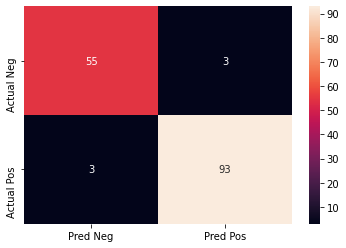

In [ ]:
plot_confusion_matrix(confusion_matrix(y_val, y_pred))

In [ ]:
# Compute True Negative by hand
pred_neg_pos = np.where(y_pred == 0)
actual_class = y_val[pred_neg_pos]
print("number of true negatives is : %.2d" % sum(actual_class == 0))

number of true negatives is : 55


# Receiver Operating Characteristics (ROC) Curve

* ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. 

* ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

# What is TPR and FPR?
 
 * TPR: Of all the things that are truly positive, how many of them did I correctly predict as positive?
 $$
 \text{TPR} = \frac{TP}{TP + FN}
 $$
 * FPR: Of all the things that are truly negative, how many of them did I falsely predict as positive?
 $$
 \text{FPR} = \frac{FP}{FP + TN}
 $$






In [ ]:
# A quick computation using the confusion matrix above. 
TPR = 93 / (93 + 3)
FPR = 3 / (3 + 55)
print("True positive rate is : %2f" % TPR)
print("False positive rate is : %2f" % FPR)

True positive rate is : 0.968750
False positive rate is : 0.051724


In [ ]:
from ipywidgets import interactive, fixed
import sklearn.metrics as metrics

In [ ]:
probas_pred = model.predict_proba(X_val)[:,1] 
fprs, tprs, thresholds = metrics.roc_curve(y_val, probas_pred)

In [ ]:
def roc(threshold, probas_pred, y_val, fprs, tprs):
    y_pred = probas_pred>=threshold

    fpr = sum(y_pred*(1-y_val))/sum(y_val == 0) 
 
    print('fpr: '+str(round(fpr,2)))

    tpr = sum(y_pred*y_val)/y_val.sum()
 
    print('tpr: '+str(round(tpr,2)))

    # dashed line 
    x_dashed = np.linspace(0, 1, num=len(fprs))
    plt.plot(fprs, tprs)
    plt.plot(x_dashed, x_dashed, linestyle='dashed', color='gray')
    plt.plot(fpr, tpr,'ro')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim(-0.01,1.01)
    plt.ylim(-0.01,1.01)

In [ ]:
interactive_plot = interactive(roc, threshold=(0,1,0.001), probas_pred=fixed(probas_pred), y_val=fixed(y_val),
                               fprs=fixed(fprs), tprs=fixed(tprs))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0, step=0.001), Output()), _dom_cl…

# Compare Classifiers

* Area under Curve (AUC) calculates the area under the ROC curve.  It is a single number that serves as a measure of aggregated classification performance. 


* A random guessing classifier that predict class +1 with probability 0.5 would have AUC 0.5.

* A good classifier should have AUC as close to 1 as possible and should have AUC at least 0.5.

In [ ]:
print("area under the curve is : %.5f" % metrics.auc(fprs, tprs))
print("area under the curve use another function is : %.5f" % metrics.roc_auc_score(y_val, probas_pred))

area under the curve is : 0.97737
area under the curve use another function is : 0.97737


# Precision and Recall

This is the criterion people usually used in Machine Learning.
* Precision: Of the ones I predicted positive, how many of them were actually positive?
$$
\text{precision} = \frac{TP}{TP + FP} \\
$$

* Recall: Same definition as TPR.
$$
\text{recall} = \frac{TP}{TP + FN}
$$

* F1-score:
$$
F_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$


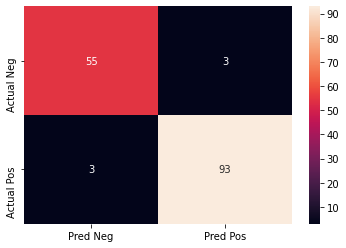

In [ ]:
plot_confusion_matrix(confusion_matrix(y_val, y_pred))

In [ ]:
# A quick computation using the confusion matrix above. 
Recall = 93 / (93 + 3)
Precision = 93 / (93  + 3)
print("Recall is : %2f" % Recall)
print("Precision is : %2f" % Precision)
print("F_1 is : %2f" % (2*Precision*Recall/(Precision+Recall)))

Recall is : 0.968750
Precision is : 0.968750
F_1 is : 0.968750


# Precision and Recall Curve

PR curve is created by plotting the **precision** against **recall** at various threshold settings. 

In [ ]:
p, r, thresholds = metrics.precision_recall_curve(y_val, probas_pred)

def pr(threshold, probas_pred, y_val, r, p):
    y_pred = probas_pred>=threshold
    if y_pred.sum()>0:
      precision = sum(y_pred*y_val)/y_pred.sum()
    else:
      precision = 1
    print('precision: '+str(round(precision,2)))
    if y_val.sum()>0:
      recall = sum(y_pred*y_val)/y_val.sum()
    else:
      recall = 1
    print('recall: '+str(round(recall,2)))

    plt.plot(r,p)
    plt.plot(recall,precision,'ro')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.xlim(-0.01,1.01)
    plt.ylim(-0.01,1.01)

interactive_plot = interactive(pr, threshold=(0,1,0.01), probas_pred=fixed(probas_pred), y_val=fixed(y_val),
                               r=fixed(r), p=fixed(p))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

# Regularization for logistic Regression: $l_1$ and $l_2$ penalty

Notice above I set the logistic regression model as `LogisticRegression(penalty = 'none')` to get the Maximum likelihood estimate of $\beta$.

The default in sklearn for `LogisticRegression` uses an $l_2$ penalty, just like ridge regression in the linear regression case.

In this case, the loss function could be viewed as the negative log-likelihood function, plus a penalty term. 
$$
\hat{\beta} = \arg\min_{w} -\frac{1}{n}l_n(\beta) + \lambda \|\beta\|^2
$$

Let's train the breast cancer dataset again.

In [ ]:
# Create and train logistic regression model
model_l2 = LogisticRegression() # default for "penalty" argument is l2 penalty.
model_l2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model_l2.score(X_val, y_val)) # obtained slightly better accuracy

0.9805194805194806


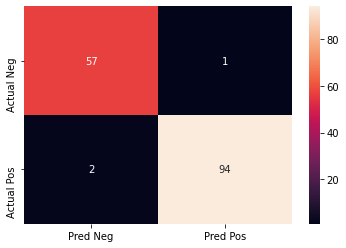

In [ ]:
y_pred = model_l2.predict(X_val)
plot_confusion_matrix(confusion_matrix(y_val, y_pred))

In [ ]:
probas_pred = model_l2.predict_proba(X_val)[:,1] 
fprs, tprs, thresholds = metrics.roc_curve(y_val, probas_pred)
interactive_plot = interactive(roc, threshold=(0,1,0.001), probas_pred=fixed(probas_pred), y_val=fixed(y_val),
                               fprs=fixed(fprs), tprs=fixed(tprs))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0, step=0.001), Output()), _dom_cl…

In [ ]:
# The AUC now is super close to 1!
print("area under the curve is : %.5f" % metrics.auc(fprs, tprs)) 

area under the curve is : 0.99264


In [ ]:
# Precision and Recall Curve
p, r, thresholds = metrics.precision_recall_curve(y_val, probas_pred)
interactive_plot = interactive(pr, threshold=(0,1,0.01), probas_pred=fixed(probas_pred), y_val=fixed(y_val),
                               r=fixed(r), p=fixed(p))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

## Try Logistic Regression with $l_1$ penalty for yourself!

In [ ]:
model_l1 = LogisticRegression(penalty = 'l2')#, solver = 'liblinear') # need to use a different solver for l1 penalty
model_l1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Breakout question: what if we have a different dataset?
What if we switch the data from the earlier example so the positives and negatives are adjacent?
What does our decision boundary look like?

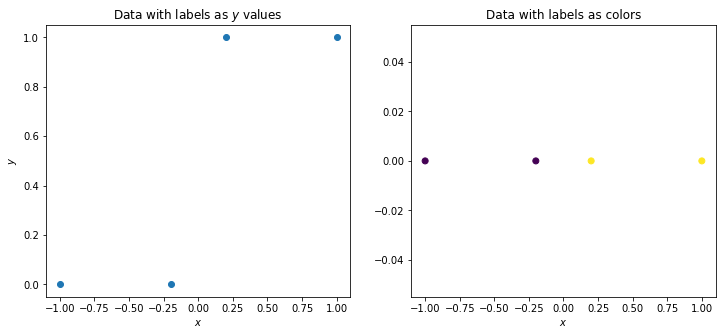

In [ ]:
# data
x_1, y_1 = (1, 1)
x_2, y_2 = (-1, 0)
x_3, y_3 = (-0.2, 0)
x_4, y_4 = (0.2, 1)

X_small = np.array([x_1, x_2, x_3, x_4]).reshape((4, 1))
X_small = np.append(np.ones((4, 1)), X_small, 1)
Y_small = np.array([y_1, y_2, y_3, y_4])

fig, axes = plt.subplots(1,2, figsize=(12, 5))
axes[0].scatter([x_1, x_2, x_3, x_4], Y_small)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('Data with labels as $y$ values')

axes[1].scatter([x_1, x_2, x_3, x_4], [0] * 4, c=Y_small)
axes[1].set_xlabel('$x$')
axes[1].set_title('Data with labels as colors')

plt.show()



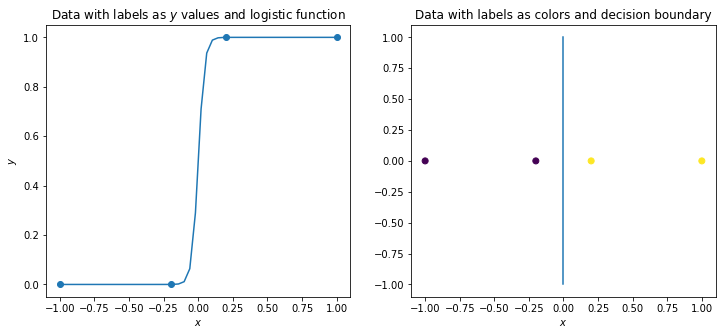

Maximum likelihood estimate would be : (0.000, 43.902)


In [ ]:
model_2 = LogisticRegression(penalty = 'none') 
model_2.fit(X_small, Y_small)

mle_estimate = model_2.coef_[0]

xs = np.linspace(-1, 1)
ys = sigmoid_function(mle_estimate[0] + xs * mle_estimate[1])

fig, axes = plt.subplots(1,2, figsize=(12, 5))
axes[0].scatter([x_1, x_2, x_3, x_4], Y_small)
axes[0].plot(xs, ys)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('Data with labels as $y$ values and logistic function')

decision_xs = [mle_estimate[0], mle_estimate[0]]
decision_ys = [-1, 1]

axes[1].scatter([x_1, x_2, x_3, x_4], [0] * 4, c=Y_small)
axes[1].plot(decision_xs, decision_ys)
axes[1].set_xlabel('$x$')
axes[1].set_title('Data with labels as colors and decision boundary')

plt.show()

print('Maximum likelihood estimate would be : (%.3f, %.3f)' % (mle_estimate[0], mle_estimate[1]))



Now our estimate of the parameter would is: $\hat{\beta}_0 = 0$, $\hat{\beta}_1 = 43.9$. We get the same decision boundary $\hat{\beta}_0 = 0$, but the "confidence" in our answer has gone up. If our data are linearly seperable like this, then the actual solution is at $\hat{\beta}_1 = \infty$. Try and think about why!